<a href="https://colab.research.google.com/github/kennyudekwu/DIGIT_CLASSIFIER_MODEL_built_from_scratch/blob/main/MNIST_classifier_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classifier

### Importing the libraries

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [3]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  29 207 253 235  77   0   

In [5]:
print(y)

[1 0 1 ... 7 6 9]


### Encoding categorical data

Label Encoding the dependent variable column

In [6]:
def one_hot(y):
  '''
  Create 2-d numpy array of y.size 
  number of rows and y.max() + 1 
  number of columns. y.max() returns 
  the highest element in the array (9), 
  accounting for a space capable of fitting
  bits of data (1s and 0s) for the second 
  to the largest element (8) with index value
  8. To account for the highest element which
  would occupy the entire fixed array size, we
  add 1 to make for index 9 of an array of values
  spanning from index 0 to index 9 -> 10 values 
  '''

  one_hot_y = np.zeros((y.size, y.max() + 1)) 
 
  '''
  Accessing the all the elements which are arrays at once
  and targeting index values corresponding to the y values, 
  converting them to 1 for all the values at once; hence the
  reason for using y which is an array as the second argument
  for the bracket notation
  '''
  one_hot_y[np.arange(y.size), y] = 1   
  one_hot_y = one_hot_y.T
  return one_hot_y


### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1) # Split data to train and test portions in the ratio 0.85 : 0.15

In [8]:
print(y_train)

[5 2 5 ... 2 1 1]


In [9]:
data = np.array(X_train)
m, n = data.shape
print(m)

35700


### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Storing unscaled values of X for future purposes
X_train_unscaled = X_train
X_test_unscaled = X_test

X_train= sc.fit_transform(X_train) # Apply feature scaling to all the rows and columns. 
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
print(X_train[0])
print(X_train_unscaled[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.72766726e-03 -7.46067509e-03 -5.29263537e-03 -5.29263537e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.29263537e-03 -5.29263537e-03 -8.86725752e-03 -1.06856249e-02
 -1.49662623e-02 -1.87179697e-02 -2.55020493e-02 -2.89291206e-02
 -3.18854181e-02 -3.22507371e-02 -3.25185630e-02 -2.93040694e-02
 -3.02778700e-02 -2.87664299e-02 -2.41500414e-02 -1.75788585e-02
 -1.49964798e-02 -9.88171057e-03 -7.30619994e-03 -5.29263537e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.29263537e-03 -5.29263537e-03
 -8.68686318e-03 -1.23556

In [13]:
print(X_test[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.72766726e-03 -7.46067509e-03 -5.29263537e-03 -5.29263537e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.29263537e-03 -5.29263537e-03 -8.86725752e-03 -1.06856249e-02
 -1.49662623e-02 -1.87179697e-02 -2.55020493e-02 -2.89291206e-02
 -3.18854181e-02 -3.22507371e-02 -3.25185630e-02 -2.93040694e-02
 -3.02778700e-02 -2.87664299e-02 -2.41500414e-02 -1.75788585e-02
 -1.49964798e-02 -9.88171057e-03 -7.30619994e-03 -5.29263537e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.29263537e-03 -5.29263537e-03
 -8.68686318e-03 -1.23556

## Part 2 - Building the ANN from Scratch


### Initializing the Weights and Biases
Weights and biases would be initialized to vector matrices of values ranging from -0.5 to +0.5, with dimesions relative to the number of neurons in the different layers of the network.


In [32]:
# Transposing matrices after splitting and feature scaling to avoid conflict
# during model's computation process 

X_train = X_train.T
X_test = X_test.T

def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  W3 = np.random.rand(10, 10) - 0.5
  b3 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2, W3, b3

In [15]:
print(init_params())

(array([[-0.14593955,  0.40957838, -0.04752076, ...,  0.13605528,
         0.16115039,  0.216557  ],
       [ 0.34760441, -0.29987   , -0.40372303, ...,  0.09616495,
         0.15999826, -0.16402617],
       [ 0.45131353, -0.11118223, -0.06604488, ...,  0.31380157,
        -0.25154144,  0.12956343],
       ...,
       [-0.4330309 , -0.17925767,  0.25226278, ...,  0.28898273,
        -0.17630916,  0.2621919 ],
       [-0.35207207,  0.12569322, -0.21907312, ...,  0.04672412,
        -0.46075311,  0.23285865],
       [ 0.33513449, -0.30804116, -0.4983507 , ...,  0.01504835,
         0.26253223,  0.2562767 ]]), array([[ 0.05572535],
       [ 0.21584258],
       [-0.06085855],
       [ 0.41519112],
       [-0.49520835],
       [ 0.27435525],
       [ 0.31308107],
       [ 0.1710745 ],
       [ 0.16599564],
       [ 0.12266082]]), array([[ 0.24076535,  0.2974696 ,  0.4233754 , -0.38830668,  0.17311919,
        -0.04965729, -0.19444514,  0.26693379, -0.03954231, -0.24343584],
       [-0.15048

### Defining Activation Functions 


In [16]:
def ReLu(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def ReLU_deriv(Z):
    return Z > 0

### Defining Forward Propagation Procedure

In [33]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = ReLu(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

### Defining Backward Propagation Procedure

In [34]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, y):
  dZ3 = A3 - one_hot(y)
  dW3 = (1/m) * dZ3.dot(A2.T)
  db3 = (1/m) * np.sum(dZ3)
  dZ2 = ReLU_deriv(Z2) * ((W3.T).dot(dZ3)) 
  dW2 = (1/m) * dZ2.dot(A1.T)
  db2 = (1/m) * np.sum(dZ2)
  dZ1 = ReLU_deriv(Z1) * ((W2.T).dot(dZ2)) 
  dW1 = (1/m) * dZ1.dot(X.T)
  db1 = (1/m) * np.sum(dZ1)
  return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1    
  W2 = W2 - alpha * dW2  
  b2 = b2 - alpha * db2    
  W3 = W3 - alpha * dW3  
  b3 = b3 - alpha * db3 
  return W1, b1, W2, b2, W3, b3

def get_predictions(A3):
  return np.argmax(A3, 0) # Returns the indices of the maximum element along each
                          # column, hence the reason for the 'axis' element taking
                          # value 0. This method was implemented because the A3 matrix 
                          # has a dimension (10*m) -> 10 rows signifying the 10 output 
                          # neurons and m representing the number of outputs for the m 
                          # number of inputs passed.
                          # If axis of value one was used, we'd be comparing values along
                          # different rows, returning in an array, maximum values of each
                          # row

def get_accuracy(predictions, y):
  print(predictions, y)
  return np.sum(predictions == y) / y.size # Compares the value in the actual result with
                                           # the prediction, giving a 1 for true (equality)
                                           # and 0 for false. The more ones, the more the 
                                           # sum of the array of 1s and 0s generated, the 
                                           # higher the fraction

def gradient_descent(X, y, alpha, epoch):
  W1, b1, W2, b2, W3, b3 = init_params()
  for i in range(epoch):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, y)
    W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

    # Viewing prediction accuracy progression during training 
    if i % 20 == 0:
      print(f"Epoch: {i}")
      predictions = get_predictions(A3)
      print(f"Accuracy score: {get_accuracy(predictions, y)}")
  return W1, b1, W2, b2, W3, b3


## Part 3 - Training the ANN

In [35]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train, 0.1, 600)

Epoch: 0
[1 7 7 ... 7 7 7] [5 2 5 ... 2 1 1]
Accuracy score: 0.09014005602240896
Epoch: 20
[1 7 3 ... 0 6 7] [5 2 5 ... 2 1 1]
Accuracy score: 0.2927731092436975
Epoch: 40
[6 0 3 ... 0 1 7] [5 2 5 ... 2 1 1]
Accuracy score: 0.3857422969187675
Epoch: 60
[6 0 3 ... 2 1 3] [5 2 5 ... 2 1 1]
Accuracy score: 0.47173669467787116
Epoch: 80
[6 0 3 ... 2 1 3] [5 2 5 ... 2 1 1]
Accuracy score: 0.5392436974789916
Epoch: 100
[6 0 3 ... 2 1 3] [5 2 5 ... 2 1 1]
Accuracy score: 0.5818207282913165
Epoch: 120
[6 0 3 ... 2 1 3] [5 2 5 ... 2 1 1]
Accuracy score: 0.5808403361344537
Epoch: 140
[6 0 3 ... 2 1 3] [5 2 5 ... 2 1 1]
Accuracy score: 0.6227450980392157
Epoch: 160
[4 0 3 ... 2 1 1] [5 2 5 ... 2 1 1]
Accuracy score: 0.6478711484593838
Epoch: 180
[4 0 5 ... 2 1 1] [5 2 5 ... 2 1 1]
Accuracy score: 0.6715406162464986
Epoch: 200
[3 0 5 ... 2 1 1] [5 2 5 ... 2 1 1]
Accuracy score: 0.6917086834733893
Epoch: 220
[3 2 5 ... 2 1 1] [5 2 5 ... 2 1 1]
Accuracy score: 0.7090756302521009
Epoch: 240
[5 2 5 ..

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [36]:
print(X_train_unscaled[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  52  67 153 160 195 216 254 149   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   5  73 132 132 227 254 254 254 254 254
 254 254   0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 138
 190 254 254 254 246 250 254 246 177 150 105  56   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 179 254 245 178  85  85  19  57  85  16
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 179 254 173   0   0   0   0   0   0   0   0   0   

In [37]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
  _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
  predictions = get_predictions(A3)
  return predictions

def compare_prediction(index, W1, b1, W2, b2, W3, b3):
  current_image = X_test_unscaled.T[:, index, None] # Fetch all rows of the element in the
                                                    # 'index' column of the test data (X_test)
  prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2, W3, b3)
  label = y_test[index]

  # Making comparison
  print(f"Prediction: {prediction}")
  print(f"Actual value: {label}")

  current_image = current_image.reshape((28, 28))
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()


**Solution**

### Predicting the Test set results

Prediction: [1]
Actual value: 1


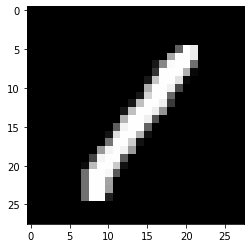

Prediction: [3]
Actual value: 5


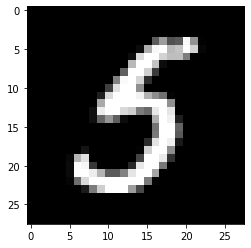

Prediction: [2]
Actual value: 2


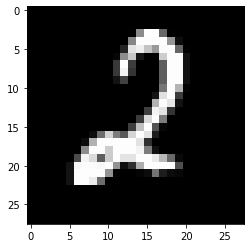

Prediction: [8]
Actual value: 8


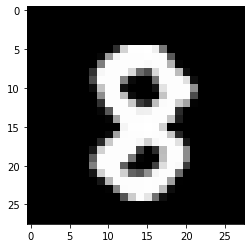

In [38]:
compare_prediction(0, W1, b1, W2, b2, W3, b3)
compare_prediction(1, W1, b1, W2, b2, W3, b3)
compare_prediction(2, W1, b1, W2, b2, W3, b3)
compare_prediction(3, W1, b1, W2, b2, W3, b3)

### Evaluating Model on Entire Test Data

In [39]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, y_test)

[1 3 2 ... 7 0 2] [1 5 2 ... 7 0 2]


0.8328571428571429

Accuracy remains ~83% just as seen after our 600th epoch of training
